In [1]:
import numpy as np
import pandas as pd

In [2]:
# load dataset
data = pd.read_table('NHANES-ICRSR25504-0013-Data.tsv', low_memory=False)

In [3]:
# check the variable names
print(list(data))

['SEQN', 'BMDSTATS', 'BMXWT', 'BMIWT', 'BMXRECUM', 'BMIRECUM', 'BMXHEAD', 'BMIHEAD', 'BMXHT', 'BMIHT', 'BMXBMI', 'BMXLEG', 'BMILEG', 'BMXCALF', 'BMICALF', 'BMXARML', 'BMIARML', 'BMXARMC', 'BMIARMC', 'BMXWAIST', 'BMIWAIST', 'BMXTHICR', 'BMITHICR', 'BMXTRI', 'BMITRI', 'BMXSUB', 'BMISUB', 'SDDSRVYR', 'RIDSTATR', 'RIDEXMON', 'RIAGENDR', 'RIDAGEYR', 'RIDAGEMN', 'RIDAGEEX', 'RIDRETH1', 'DMQMILIT', 'DMDBORN', 'DMDCITZN', 'DMDYRSUS', 'DMDEDUC3', 'DMDEDUC2', 'DMDSCHOL', 'DMDMARTL', 'DMDHHSIZ', 'DMDFMSIZ', 'INDHHINC', 'INDFMINC', 'INDFMPIR', 'RIDEXPRG', 'DMDHRGND', 'DMDHRAGE', 'DMDHRBRN', 'DMDHREDU', 'DMDHRMAR', 'DMDHSEDU', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'AIALANG', 'WTINT2YR', 'WTMEC2YR', 'SDMVPSU', 'SDMVSTRA']


In [4]:
# modify the dataset by selecting only adults (ages are between 18 and 60)
# exclude race/ethnicity 2) Other hispanic and 5) Other races at the same time
data = data[(data['RIDAGEYR'] >= 18) & (data['RIDAGEYR'] <= 60) & (data['RIDRETH1'] != 2) & (data['RIDRETH1'] != 5)]

In [5]:
# shape of the temp set
data.shape

(3592, 69)

In [6]:
# generate lists of variables to be used
id_number = ["SEQN"]
age_gender = ["RIDAGEYR", "RIAGENDR"]
measurements = ["BMXWT", "BMXHT", "BMXBMI", "BMXLEG", "BMXCALF", "BMXARML", "BMXARMC", "BMXWAIST", "BMXTRI", 
                   "BMXSUB", "BMXTHICR"]
features = age_gender + measurements
target = ["RIDRETH1"]

# generate a new dataset and set id_number as index
data_new = data[id_number + features + target].set_index(id_number)

In [7]:
# shape of the new dataset
data_new.shape

(3592, 14)

In [8]:
# new dataset info
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 31131 to 41473
Data columns (total 14 columns):
RIDAGEYR    3592 non-null int64
RIAGENDR    3592 non-null int64
BMXWT       3592 non-null object
BMXHT       3592 non-null object
BMXBMI      3592 non-null object
BMXLEG      3592 non-null object
BMXCALF     3592 non-null object
BMXARML     3592 non-null object
BMXARMC     3592 non-null object
BMXWAIST    3592 non-null object
BMXTRI      3592 non-null object
BMXSUB      3592 non-null object
BMXTHICR    3592 non-null object
RIDRETH1    3592 non-null int64
dtypes: int64(3), object(11)
memory usage: 420.9+ KB


In [9]:
data_new.head()

,RIDAGEYR,RIAGENDR,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXCALF,BMXARML,BMXARMC,BMXWAIST,BMXTRI,BMXSUB,BMXTHICR,RIDRETH1
SEQN,,,,,,,,,,,,,,
31131,44,2,75.2,156,30.9,38,36.6,35,35.8,96,,,53.7,4
31143,19,1,76.4,184,22.57,49.1,36.7,41.4,28.6,84.2,12.8,7.4,52.4,3
31151,59,2,82.9,167.6,29.51,34.5,36.5,38.5,39.5,101.2,16.6,32.4,54,4
31152,27,2,94.1,153.6,39.88,33.8,39.6,34,38.2,130.4,29.4,36,53.9,1
31156,43,2,79.9,159.5,31.41,39,41.5,34.3,35.5,91.4,,,57.1,4


In [10]:
# convert object to numeric
for m in measurements:
    data_new[m] = pd.to_numeric(data_new[m], errors='coerce')

In [11]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3592 entries, 31131 to 41473
Data columns (total 14 columns):
RIDAGEYR    3592 non-null int64
RIAGENDR    3592 non-null int64
BMXWT       3559 non-null float64
BMXHT       3562 non-null float64
BMXBMI      3556 non-null float64
BMXLEG      3411 non-null float64
BMXCALF     3457 non-null float64
BMXARML     3475 non-null float64
BMXARMC     3475 non-null float64
BMXWAIST    3455 non-null float64
BMXTRI      3103 non-null float64
BMXSUB      2662 non-null float64
BMXTHICR    3407 non-null float64
RIDRETH1    3592 non-null int64
dtypes: float64(11), int64(3)
memory usage: 420.9 KB


In [12]:
# remove the samples containing nulls
data_new.dropna(inplace=True)

In [13]:
data_new.shape

(2535, 14)

In [14]:
data_new.describe()

,RIDAGEYR,RIAGENDR,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXCALF,BMXARML,BMXARMC,BMXWAIST,BMXTRI,BMXSUB,BMXTHICR,RIDRETH1
count,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000
mean,34.407495,1.495069,75.167613,169.299223,26.113321,40.224773,37.861933,37.331795,31.355345,90.921262,17.448718,19.352623,52.163748,2.727022
std,12.798081,0.500074,16.480784,9.974272,4.670629,3.796772,3.718947,2.789389,4.262982,13.130786,8.058431,7.769431,5.950257,1.095859
min,18.000000,1.000000,36.700000,142.100000,14.650000,24.200000,24.200000,29.400000,19.000000,56.000000,3.000000,5.000000,29.300000,1.000000
25%,23.000000,1.000000,63.200000,162.050000,22.765000,37.600000,35.400000,35.300000,28.300000,81.100000,11.000000,13.000000,48.200000,1.000000
50%,33.000000,1.000000,73.800000,168.800000,25.670000,40.200000,37.700000,37.200000,31.200000,89.800000,16.200000,18.600000,51.700000,3.000000
75%,45.000000,2.000000,84.550000,176.300000,28.905000,42.800000,40.100000,39.300000,34.200000,99.600000,23.000000,24.900000,55.700000,3.000000
max,60.000000,2.000000,180.200000,200.700000,47.150000,53.200000,54.000000,48.600000,50.600000,149.500000,42.900000,40.200000,82.700000,4.000000


In [15]:
# checking the number of instances that belong to each RIDRETH1 class
data_new.groupby('RIDRETH1').size()

RIDRETH1
1     654
3    1265
4     616
dtype: int64

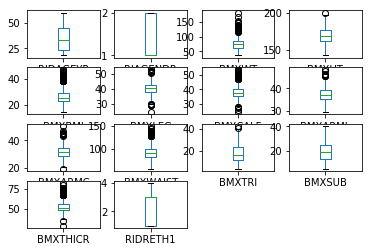

In [16]:
import matplotlib.pyplot as plt
# box plots of varialbles
data_new.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False)
plt.show()

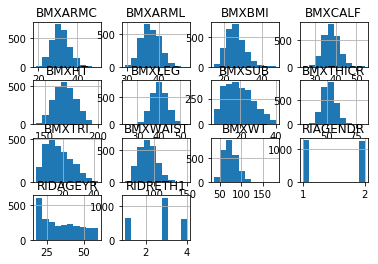

In [17]:
# histograms
data_new.hist()
plt.show()

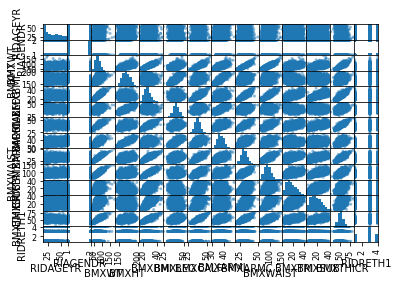

In [18]:
# scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(data_new)
plt.show()

In [19]:
# generate target set (y)
y = data_new["RIDRETH1"]

In [20]:
y.shape

(2535,)

In [21]:
# remove target column from data
data_new.drop(["RIDRETH1"], axis=1, inplace=True)

In [22]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2535 entries, 31143 to 41473
Data columns (total 13 columns):
RIDAGEYR    2535 non-null int64
RIAGENDR    2535 non-null int64
BMXWT       2535 non-null float64
BMXHT       2535 non-null float64
BMXBMI      2535 non-null float64
BMXLEG      2535 non-null float64
BMXCALF     2535 non-null float64
BMXARML     2535 non-null float64
BMXARMC     2535 non-null float64
BMXWAIST    2535 non-null float64
BMXTRI      2535 non-null float64
BMXSUB      2535 non-null float64
BMXTHICR    2535 non-null float64
dtypes: float64(11), int64(2)
memory usage: 277.3 KB


In [23]:
# generate the set of features (X)
X = data_new.values

In [24]:
X.shape

(2535, 13)

In [25]:
# Split the X and y sets into train and validation sets
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=0)

In [26]:
# transform features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scale = scaler.fit_transform(X_train)
X_validation_scale = scaler.transform(X_validation)

In [27]:
# import machine learning algorithms
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('RFC', RandomForestClassifier()))
models.append(('ETC', ExtraTreesClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(("NN", MLPClassifier()))
models.append(("GB", GradientBoostingClassifier()))

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=10)
    cv_results = cross_val_score(model, X_train_scale, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.635409 (0.040810)
LDA: 0.647506 (0.035888)


/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


RFC: 0.581805 (0.024939)
ETC: 0.572833 (0.033037)
KNN: 0.543910 (0.020941)
CART: 0.502896 (0.024074)
NB: 0.492339 (0.041339)
SVM: 0.561805 (0.018185)
NN: 0.650672 (0.034829)
GB: 0.639622 (0.034624)


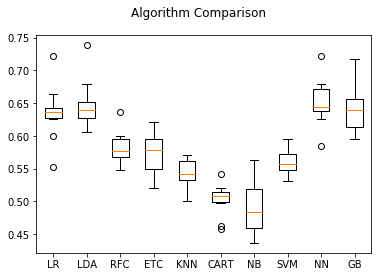

In [29]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [30]:
# train with Neural Networks algorithm
# compute the accuracy score with different alpha when training on train and validation sets

alphas = [0.01, 0.05, 0.1, 0.25, 0.5, 1, 10]
for alpha in alphas:
    nn = MLPClassifier(hidden_layer_sizes=(100, 100), alpha=alpha, random_state=0)
    nn.fit(X_train_scale, y_train)
    print("alpha: ", alpha)
    print("Accuracy score (training): {0:.3f}".format(nn.score(X_train_scale, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(nn.score(X_validation_scale, y_validation)))
    print()

alpha:  0.01
Accuracy score (training): 0.670
Accuracy score (validation): 0.658

alpha:  0.05
Accuracy score (training): 0.672
Accuracy score (validation): 0.655

alpha:  0.1
Accuracy score (training): 0.668
Accuracy score (validation): 0.661

alpha:  0.25
Accuracy score (training): 0.664
Accuracy score (validation): 0.669

alpha:  0.5
Accuracy score (training): 0.663
Accuracy score (validation): 0.666

alpha:  1
Accuracy score (training): 0.649
Accuracy score (validation): 0.656

alpha:  10
Accuracy score (training): 0.501
Accuracy score (validation): 0.494



In [31]:
# Output confusion matrix and classification report of Neural Networks algorithm on validation set

nn = MLPClassifier(hidden_layer_sizes=(100, 100), alpha=0.25, random_state=0)
nn.fit(X_train_scale, y_train)
predictions = nn.predict(X_validation_scale)

print("Confusion Matrix:")
print(confusion_matrix(y_validation, predictions))
print()
print("Classification Report")
print(classification_report(y_validation, predictions))

Confusion Matrix:
[[105  58   6]
 [ 39 248  26]
 [ 18  63  71]]

Classification Report
             precision    recall  f1-score   support

          1       0.65      0.62      0.63       169
          3       0.67      0.79      0.73       313
          4       0.69      0.47      0.56       152

avg / total       0.67      0.67      0.66       634



In [32]:
# train with Linear Discriminant Analysis algorithm
# compute the accuracy score with different numbers of components when training on train and validation sets

n_components = [3, 5, 10]
for n_component in n_components:
    lda = LinearDiscriminantAnalysis(n_components=n_component, solver="svd")
    lda.fit(X_train_scale, y_train)
    print("n_components: ", n_component)
    print("Accuracy score (training): {0:.3f}".format(lda.score(X_train_scale, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(lda.score(X_validation_scale, y_validation)))
    print()    

n_components:  3
Accuracy score (training): 0.656
Accuracy score (validation): 0.669

n_components:  5
Accuracy score (training): 0.656
Accuracy score (validation): 0.669

n_components:  10
Accuracy score (training): 0.656
Accuracy score (validation): 0.669



In [33]:
# Output confusion matrix and classification report of Linear Discriminant Analysis algorithm on validation set

lda = LinearDiscriminantAnalysis(n_components=3, solver="svd")
lda.fit(X_train_scale, y_train)
predictions = nn.predict(X_validation_scale)

print("Confusion Matrix:")
print(confusion_matrix(y_validation, predictions))
print()
print("Classification Report")
print(classification_report(y_validation, predictions))

Confusion Matrix:
[[105  58   6]
 [ 39 248  26]
 [ 18  63  71]]

Classification Report
             precision    recall  f1-score   support

          1       0.65      0.62      0.63       169
          3       0.67      0.79      0.73       313
          4       0.69      0.47      0.56       152

avg / total       0.67      0.67      0.66       634



In [34]:
# train with Gradient Boosting algorithm
# compute the accuracy score with different learning rate when training on train and validation sets

learning_rates = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 5]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(criterion="mse", n_estimators=50, learning_rate = learning_rate, max_features=4, max_depth = 1, random_state = 0)
    gb.fit(X_train_scale, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train_scale, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_validation_scale, y_validation)))
    print()

Learning rate:  0.01
Accuracy score (training): 0.506
Accuracy score (validation): 0.495

Learning rate:  0.05
Accuracy score (training): 0.563
Accuracy score (validation): 0.547

Learning rate:  0.1
Accuracy score (training): 0.582
Accuracy score (validation): 0.558

Learning rate:  0.25
Accuracy score (training): 0.629
Accuracy score (validation): 0.632

Learning rate:  0.5
Accuracy score (training): 0.683
Accuracy score (validation): 0.640

Learning rate:  0.75
Accuracy score (training): 0.714
Accuracy score (validation): 0.644

Learning rate:  1
Accuracy score (training): 0.720
Accuracy score (validation): 0.645

Learning rate:  5
Accuracy score (training): 0.306
Accuracy score (validation): 0.298



In [35]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(criterion="mse", n_estimators=50, learning_rate = 0.25, max_features=4, max_depth = 1, random_state = 0)
gb.fit(X_train_scale, y_train)
predictions = gb.predict(X_validation_scale)

print("Confusion Matrix:")
print(confusion_matrix(y_validation, predictions))
print()
print("Classification Report")
print(classification_report(y_validation, predictions))

Confusion Matrix:
[[ 78  86   5]
 [ 23 270  20]
 [ 12  87  53]]

Classification Report
             precision    recall  f1-score   support

          1       0.69      0.46      0.55       169
          3       0.61      0.86      0.71       313
          4       0.68      0.35      0.46       152

avg / total       0.65      0.63      0.61       634

